<a href="https://colab.research.google.com/github/kwon0915/Kwon-Hyeong-Joong/blob/master/mnist_cnn_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#module name : mnist_dl.py

from keras.datasets import mnist
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

np.random.seed(121)
tf.random.set_seed(121)

In [ ]:
def CHART_PLOT_HISTORY(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='acc')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val_acc')
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'],    label='loss')
    plt.plot(hist['epoch'], hist['val_loss'],label='val_loss')
    plt.legend()
    plt.show()

In [ ]:
(X_train, y_train),(X_test, y_test) = mnist.load_data() #학습용 문제/답안, 테스트용 문제/답안
#[0 0 0 0 0 12 25 125 124 0 0 0 0] 9
#/datasets/train/cat0.jpg
#[0 0 0 0 0 12 25 125 124 0 0 0 0] cat
#[4 2 5 4 7 8 1 5 8 ... N]
#train, test 둘 다 레이블화 시킬 필요가 있음

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [ ]:
print(X_test.shape, y_test.shape, y_test[:2]) #2개만 출력해봄

(10000, 28, 28) (10000,) [7 2]


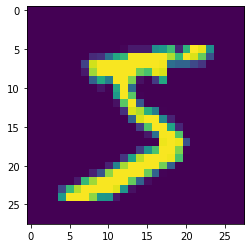

In [ ]:
plt.imshow(X_train[0]) #한장만 보겠음
plt.show()

In [ ]:
print(y_train[0]) #첫번째 사진 정답 출력

5


In [ ]:
from keras.models import Sequential
#----------------------------------------FC -> CNN : Conv2D, MaxPool2D, Flatten
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
#X_train (60000, 28(W), 28(H), 1(Channel))
# 1 : 채널 (따로 표기가 안 되어있기에 1)
X_train = X_train.reshape(X_train.shape[0], 28,28,1) / 255 #넓이, 높이, 채널(흑백:1, RGB컬러 다 살릴거면:3)로 reshape 해야함 #width,height의 채널값으로 들어가야함(28,28)
#X_test (60000, 28(W), 28(H), 1(Channel))
X_test = X_test.reshape(X_test.shape[0], 28,28,1) / 255
#print(X_train[0]) #첫번째 사진 출력 (784개의 픽셀 가지고 있음) - 이미지 스케일링은 최고 픽셀값 255(0~255 픽셀컬러)으로 나누면 됨 (최대값은 1, 나머지는 0.x. 0~1사이에 값이 들어오게 됨)
#MinMaxScaler도 가능하지만 이미지는 255로 나누는게 낫다

In [ ]:
model = Sequential()
#사진이 3차원이기에 3차원을 1차원으로 평면화시켜야 함 . cnn이 기존이미지 공간정보를 유지하며 학습시킬수 있기에
#filters, kernel_size, strides=(1, 1), padding='valid' #필터사이즈, 채널값 필요, 패딩은 기본적으로 valid
model.add(Conv2D(filters=20, kernel_size=(4,4), input_shape=(28,28,1), activation='relu')) #input_shape: 위에서 resize한 그대로 가져오기 #한 장 모양 넣기. 이런게 6만장 있음
model.add(MaxPool2D(pool_size=(2, 2))) #반으로 줄이기
model.add(Conv2D(filters=40, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2))) #6*6*40 (28*28에서 줄어든 것) #54~57줄 부분을 잘 조정하는 것이 중요!
model.add(Flatten()) #만든만큼 펴라(numpy array 상태로 한줄로 펴기) / FC에서는 input_dim=6*6*1*50으로 정해줬어야 했지만 굳이 안써도됨. 알아서 전달받아서 Flatten에서 처리됨
#Flatten : CNN과 FC의 연결고리(FC의 input_dim 역할을 함)
model.add(Dense(64, activation='relu')) #cnn으로 특징을 가져왔으므로 dense를 깊게 할 필요가 없음->입력,출력만 남겨둬도 ok #만든만큼 건내주면 되므로 input_dim 필요없음(flatten 사용)
model.add(Dense(10, activation='softmax')) #0~9까지 손글씨 이므로 출력:10
print(model.summary()) #Total params: 53,018 -> Total params: 72,294

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 20)        340       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 40)        7240      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 40)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1000)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                64064     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [ ]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
#sklearn OneHotEnconder
#keras to_categorical :onehotencoding해주는 역할. 그러면 crossentropy는 sparse 제외한 categorical_entropy로 해줘야 한다
#원핫인코딩,
from keras.utils import to_categorical
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

In [ ]:
model.compile(loss='categorical_crossentropy',  #onehotencoding이면 categorical cf.0/1로 구분하는거면 sigmoid
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 100, batch_size=300, validation_data=(X_test, y_test), callbacks=[early_stop]) #verbose=0으로 하면 로그 안찍히지만 돌아가는지 확인 어려울 수 있음
#Overfitting 발생(주황색선이 더이상 증가하지 않으면 스탑시켜야함) -> epoch 12번 정도가 적당? #학습은 하면 할수록 0으로 가까워짐 -> overfitting(학습만 잘되고 그 이외 데이터 못맞춤)
#학습시킬때 6만장 다 주면됨. 레이블도 6만장

Epoch 1/100
200/200 [==============================] - 25s 120ms/step - loss: 0.8686 - accuracy: 0.7684 - val_loss: 0.1020 - val_accuracy: 0.9703
Epoch 2/100
200/200 [==============================] - 23s 117ms/step - loss: 0.1026 - accuracy: 0.9706 - val_loss: 0.0618 - val_accuracy: 0.9796
Epoch 3/100
200/200 [==============================] - 24s 119ms/step - loss: 0.0670 - accuracy: 0.9804 - val_loss: 0.0479 - val_accuracy: 0.9830
Epoch 4/100
200/200 [==============================] - 24s 119ms/step - loss: 0.0528 - accuracy: 0.9834 - val_loss: 0.0416 - val_accuracy: 0.9870
Epoch 5/100
200/200 [==============================] - 24s 118ms/step - loss: 0.0439 - accuracy: 0.9869 - val_loss: 0.0393 - val_accuracy: 0.9869
Epoch 6/100
200/200 [==============================] - 24s 118ms/step - loss: 0.0368 - accuracy: 0.9887 - val_loss: 0.0347 - val_accuracy: 0.9893
Epoch 7/100
200/200 [==============================] - 24s 121ms/step - loss: 0.0302 - accuracy: 0.9906 - val_loss: 0.0318 -

In [ ]:
print('acc: {:.4f}, loss: {:.4f}'.format(model.evaluate(X_test, y_test)[1], model.evaluate(X_test, y_test)[0])) #acc: 0.9733, loss: 0.1115 -> acc: 0.9899, loss: 0.0404


313/313 [==============================] - 2s 5ms/step - loss: 0.0322 - accuracy: 0.9910
acc: 0.9910, loss: 0.0322


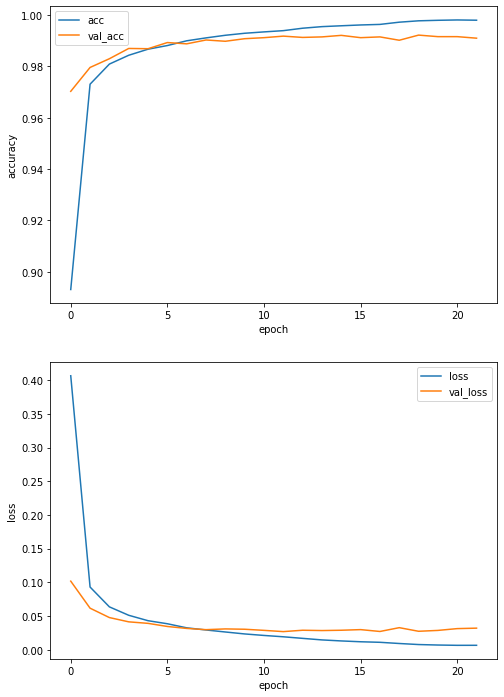

In [ ]:
CHART_PLOT_HISTORY(history)